In [1]:
import pandas as pd
import numpy as np

import glob
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
folder = 'all_ttl_analysis/'
all_files = glob.glob(folder + "/*.csv")

In [3]:
df_list_all = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['file_name'] = filename.replace('all_ttl_analysis/ttl_','').replace('.pcap.csv','')
    df_list_all.append(df)

df_all = pd.concat(df_list_all)
del df_all['Unnamed: 0']
df_all.rename(columns={'file_name':'fingerprint_key'}, inplace=True)
df_all.reset_index(inplace=True)

In [4]:
display(df_all.head())
display(df_all.tail())

,index,ip,num_pkts,mean,median,distinct_values,delta,fingerprint_key
0,0,1.0.172.73,1,118.0,118.0,[118],0,066e98334a23b2b6bd4d95d572fea817
1,1,1.10.159.124,2,118.0,118.0,[118],0,066e98334a23b2b6bd4d95d572fea817
2,2,1.100.152.79,1,118.0,118.0,[118],0,066e98334a23b2b6bd4d95d572fea817
3,3,1.100.190.127,1,117.0,117.0,[117],0,066e98334a23b2b6bd4d95d572fea817
4,4,1.101.212.8,1,118.0,118.0,[118],0,066e98334a23b2b6bd4d95d572fea817


,index,ip,num_pkts,mean,median,distinct_values,delta,fingerprint_key
1764784,18653,99.9.58.205,1,239.0,239.0,[239],0,0e0ad1669ed7b4bd375b16bbe0852386
1764785,18654,99.90.108.108,1,239.0,239.0,[239],0,0e0ad1669ed7b4bd375b16bbe0852386
1764786,18655,99.90.109.19,1,239.0,239.0,[239],0,0e0ad1669ed7b4bd375b16bbe0852386
1764787,18656,99.91.26.32,1,239.0,239.0,[239],0,0e0ad1669ed7b4bd375b16bbe0852386
1764788,18657,99.97.128.19,1,239.0,239.0,[239],0,0e0ad1669ed7b4bd375b16bbe0852386


## How may IP addresses (NO distinct)?

In [5]:
num_all_ips = len(df_all)
num_all_ips

1764789

## How many of these IP addresses have the delta <5?

In [6]:
df_relevant =df_all[df_all['delta']<5]
ttl_delta_lower5 = len(df_relevant)
ttl_delta_lower5

1737209

## How many of are outliers that should be later investigated?

In [7]:
num_all_ips - ttl_delta_lower5

27580

## How many IP addresses per attack?

In [8]:
ips_per_attack = df_all['fingerprint_key'].value_counts()
print('Number of attacks:', len(ips_per_attack))
display(ips_per_attack)


Number of attacks: 39


0d8119604993f414d5677ad5d12b5ccf      1597039
066e98334a23b2b6bd4d95d572fea817        76031
07643f4c01920d5130226ed9f19d4b1e        21437
0e0ad1669ed7b4bd375b16bbe0852386        18658
13dcbff6256ea2f72064d3f5a517f893        16326
156405ae844c064eb64c411a7d338b94         9739
0ac695f2b205e619618265f72b69ff2a         8314
0894623296ecae40349eff74e4fa1f1f         6990
11c8b98d184d12b146f526d8f293e7ec         6240
ffd1822ab7ae0e21e4b618bbcbd3dfb5         2162
0b605258e1a354f3552dd45b4dd3ba54          724
0e35929e41858f4e8f7adbbead019c09_4        470
1500b674e1ef027b001efacd4a0dcff5          385
01dd938e512bd560020dee459a32a5d5           34
1275d75edb74854d9fa0e13325f253a6           32
07618097a64126cfe87e099b3054a073           29
14dd8e6fdcecd5d02573af4ae38f2449           18
00631e77cb5c08e9d5e7673a73bcd887           18
a5bf72a3499a3b4d8e3f0371dbb3bdcf           16
07047eb879829a0f00ba03fa1425a2ae           16
10c774e657315ee95dc8501cdfb7f3fa           15
049411a0b2a96a29632f25a0608e067b  

## How many attacks have outliers?

In [9]:
outlier_ips_per_attack = df_all[df_all['delta']>4]['fingerprint_key'].value_counts()
print('Attacks with IP addresses with TTl delta >4:', len(outlier_ips_per_attack))
display(outlier_ips_per_attack)

Attacks with IP addresses with TTl delta >4: 11


0d8119604993f414d5677ad5d12b5ccf    27554
0b605258e1a354f3552dd45b4dd3ba54        8
ffd1822ab7ae0e21e4b618bbcbd3dfb5        8
0e0ad1669ed7b4bd375b16bbe0852386        2
0ac695f2b205e619618265f72b69ff2a        2
156405ae844c064eb64c411a7d338b94        1
07643f4c01920d5130226ed9f19d4b1e        1
0539e6100beb380efd42766a5d8623df        1
1275d75edb74854d9fa0e13325f253a6        1
0894623296ecae40349eff74e4fa1f1f        1
14dd8e6fdcecd5d02573af4ae38f2449        1
Name: fingerprint_key, dtype: int64

## What is the distribution of median of TTL values (for TTL >5)?

In [10]:
medians = df_relevant['median'].value_counts()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


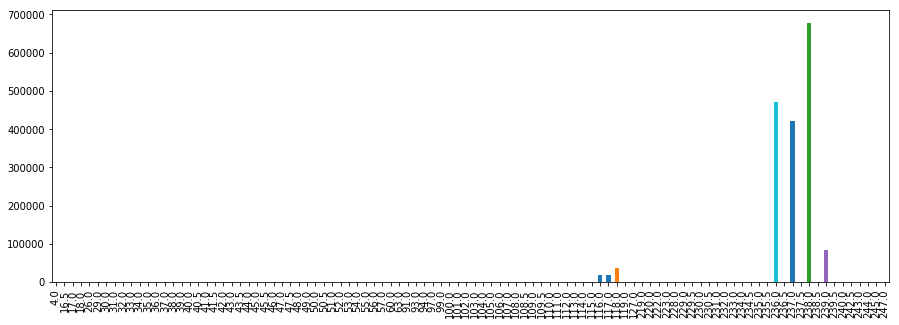

In [22]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1,1),(0,0))

medians.sort_index().plot(ax=ax, kind='bar')
# ax.set_yscale('log')
fig.show()

## For ploting an specific attack

In [24]:
df_all[df_all['fingerprint_key']=='14dd8e6fdcecd5d02573af4ae38f2449']

,index,ip,num_pkts,mean,median,distinct_values,delta,fingerprint_key
1703806,0,109.169.45.81,267,110.000000,110.0,[110],0,14dd8e6fdcecd5d02573af4ae38f2449
1703807,1,109.224.2.77,249,111.000000,111.0,[111],0,14dd8e6fdcecd5d02573af4ae38f2449
1703808,2,122.154.238.10,598,46.633779,47.0,[47 46],1,14dd8e6fdcecd5d02573af4ae38f2449
1703809,3,122.154.73.42,1558,45.627086,46.0,[45 46],1,14dd8e6fdcecd5d02573af4ae38f2449
1703810,4,175.138.67.50,267,60.441948,60.0,[60 61],1,14dd8e6fdcecd5d02573af4ae38f2449
1703811,5,178.21.237.130,986,110.000000,110.0,[110],0,14dd8e6fdcecd5d02573af4ae38f2449
1703812,6,180.180.126.177,3300,43.997273,44.0,[44 43 42],2,14dd8e6fdcecd5d02573af4ae38f2449
1703813,7,195.175.90.210,1561,45.677771,45.0,[48 44 45],4,14dd8e6fdcecd5d02573af4ae38f2449
1703814,8,198.101.202.60,488,110.204918,111.0,[112 111 108 106],6,14dd8e6fdcecd5d02573af4ae38f2449
1703815,9,203.186.108.102,531,46.480226,46.0,[47 46 48],2,14dd8e6fdcecd5d02573af4ae38f2449
